### 교차 검증 실습

In [79]:
import os, warnings
import numpy as np
# 경고 메세지 무시하거나 숨길때(ignore), 다시보이게(default)
# warnings.filterwarnings(action='ignore')
warnings.filterwarnings(action='ignore')

In [80]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [81]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train.shape, test.shape

((891, 12), (418, 11))

### 데이터 확인

In [82]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 결측치 처리
* train
    * Age
    * Cabin
    * Embarked
* test
    * Age
    * Cabin
    * Fare

* train, test 둘다 처리
    * Age
    * Cabin
* train : Embarked
* test : Fare

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [85]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### Age 결측치 평균으로 채우기

In [86]:
train.Age = train.Age.fillna(train.Age.mean())
test.Age = test.Age.fillna(train.Age.mean())
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(None, None)

#### Cabin 결측치 처리
* nan : 0
* 나머지 : 1

In [87]:
train['Cabin_n'] = train['Cabin'].notnull().astype(int)
test['Cabin_n'] = test['Cabin'].notnull().astype(int)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_n
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [88]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_n
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [89]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Cabin_n      891 non-null    int32  
dtypes: float64(2), int32(1), int64(5), object(5)
memory usage: 87.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0 

(None, None)

#### EMbarked 결측치 처리

In [90]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [91]:
test.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [92]:
train.Embarked = train.Embarked.fillna('S')
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Cabin_n      891 non-null    int32  
dtypes: float64(2), int32(1), int64(5), object(5)
memory usage: 87.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0 

(None, None)

#### test 'Fare' 결측치 중앙값으로 처리

In [93]:
test['Fare'] = test['Fare'].median()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Cabin_n      418 non-null    int32  
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 37.7+ KB


### 데이터 형태 수치형으로 변환
* Sex
* Embarked

#### Sex 맵핑해서 Sex_n 생성
* 'male':1, 'female':2

In [94]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [95]:
test.Sex.value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [96]:
train['Sex_n'] = train.Sex.map({'male':1, 'female':2})
test['Sex_n'] = test.Sex.map({'male':1, 'female':2})
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Cabin_n      891 non-null    int32  
 13  Sex_n        891 non-null    int64  
dtypes: float64(2), int32(1), int64(6), object(5)
memory usage: 94.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---

(None, None)

#### Embarked 맵핑해서 Embarked_n 생성
* 'S':1, 'C':2, 'Q':3

In [97]:
train['Embarked_n'] = train['Embarked'].map({'S':1, 'C':2, 'Q':3})
test['Embarked_n'] = test['Embarked'].map({'S':1, 'C':2, 'Q':3})
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Cabin_n      891 non-null    int32  
 13  Sex_n        891 non-null    int64  
 14  Embarked_n   891 non-null    int64  
dtypes: float64(2), int32(1), int64(7), object(5)
memory usage: 101.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #

(None, None)

### 데이터 분할 및 특성 선택

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
sel = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin_n', 'Sex_n', 'Embarked_n']

<AxesSubplot:>

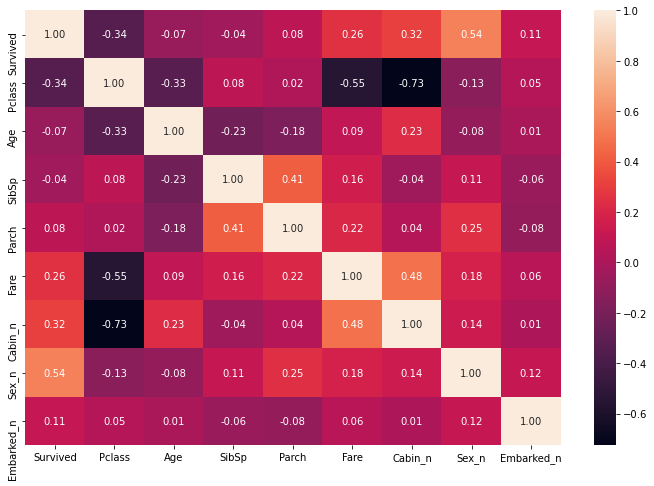

In [100]:
plt.figure(figsize=(12,8))
sns.heatmap(train[sel].corr(), annot=True, fmt='.2f')

In [101]:
sel = ['Pclass', 'Fare', 'Cabin_n', 'Sex_n', 'Embarked_n']
X = train[sel]
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((668, 5), (668,), (223, 5), (223,))

### 모델 생성, 교차 검증

In [102]:
knn = KNeighborsClassifier()
knn.fit(X_train,  y_train)
# kfold = KFold(n_splits=cv 개수, shuffle=샘플을 섞는 여부)
kfold = KFold(n_splits=5, shuffle=True)
# scores = cross_val_score(모델 객체, 입력, 결과, cv = cross_validation)
score = cross_val_score(knn, X_test, y_test, cv=kfold)
print(f"교차 검증 점수 : {score}")
print("교자 검증 점수 평균 :", score.mean())

교차 검증 점수 : [0.91111111 0.73333333 0.68888889 0.84090909 0.75      ]
교자 검증 점수 평균 : 0.7848484848484848


### knn 모델 test_size 조절하여 정확도 올리기

##### 훈련 : 테스트 = 9 : 1

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((801, 5), (801,), (90, 5), (90,))

In [104]:
knn.fit(X_train,  y_train)
# kfold = KFold(n_splits=cv 개수, shuffle=샘플을 섞는 여부)
kfold = KFold(n_splits=5, shuffle=True)
# scores = cross_val_score(모델 객체, 입력, 결과, cv = cross_validation)
score = cross_val_score(knn, X_test, y_test, cv=kfold)
print(f"교차 검증 점수 : {score}")
print("교자 검증 점수 평균 :", score.mean())

교차 검증 점수 : [0.66666667 0.66666667 0.77777778 0.66666667 0.66666667]
교자 검증 점수 평균 : 0.6888888888888889


##### 훈련 : 테스트 = 8 : 2

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((712, 5), (712,), (179, 5), (179,))

In [106]:
knn.fit(X_train,  y_train)
# kfold = KFold(n_splits=cv 개수, shuffle=샘플을 섞는 여부)
kfold = KFold(n_splits=5, shuffle=True)
# scores = cross_val_score(모델 객체, 입력, 결과, cv = cross_validation)
score = cross_val_score(knn, X_test, y_test, cv=kfold)
print(f"교차 검증 점수 : {score}")
print("교자 검증 점수 평균 :", score.mean())

교차 검증 점수 : [0.77777778 0.72222222 0.72222222 0.72222222 0.77142857]
교자 검증 점수 평균 : 0.7431746031746032


##### 훈련 : 테스트 = 7 : 3

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((623, 5), (623,), (268, 5), (268,))

In [108]:
knn.fit(X_train,  y_train)
# kfold = KFold(n_splits=cv 개수, shuffle=샘플을 섞는 여부)
kfold = KFold(n_splits=5, shuffle=True)
# scores = cross_val_score(모델 객체, 입력, 결과, cv = cross_validation)
score = cross_val_score(knn, X_test, y_test, cv=kfold)
print(f"교차 검증 점수 : {score}")
print("교자 검증 점수 평균 :", score.mean())

교차 검증 점수 : [0.74074074 0.77777778 0.66666667 0.79245283 0.73584906]
교자 검증 점수 평균 : 0.7426974143955276


##### 훈련 : 테스트 = 6 : 4

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((534, 5), (534,), (357, 5), (357,))

In [110]:
knn.fit(X_train,  y_train)
# kfold = KFold(n_splits=cv 개수, shuffle=샘플을 섞는 여부)
kfold = KFold(n_splits=5, shuffle=True)
# scores = cross_val_score(모델 객체, 입력, 결과, cv = cross_validation)
score = cross_val_score(knn, X_test, y_test, cv=kfold)
print(f"교차 검증 점수 : {score}")
print("교자 검증 점수 평균 :", score.mean())

교차 검증 점수 : [0.70833333 0.73611111 0.71830986 0.57746479 0.69014085]
교자 검증 점수 평균 : 0.6860719874804382


##### 훈련 : 테스트 = 5 : 5

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((445, 5), (445,), (446, 5), (446,))

In [112]:
knn.fit(X_train,  y_train)
# kfold = KFold(n_splits=cv 개수, shuffle=샘플을 섞는 여부)
kfold = KFold(n_splits=5, shuffle=True)
# scores = cross_val_score(모델 객체, 입력, 결과, cv = cross_validation)
score = cross_val_score(knn, X_test, y_test, cv=kfold)
print(f"교차 검증 점수 : {score}")
print("교자 검증 점수 평균 :", score.mean())

교차 검증 점수 : [0.78888889 0.82022472 0.68539326 0.69662921 0.78651685]
교자 검증 점수 평균 : 0.7555305867665418


#### test_size 조절해서 교차 검증 점수 출력

In [113]:
for i in range(1, 6):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = (i/10), random_state=0)
    knn.fit(X_train,  y_train)
    # kfold = KFold(n_splits=cv 개수, shuffle=샘플을 섞는 여부)
    kfold = KFold(n_splits=5, shuffle=True)
    # scores = cross_val_score(모델 객체, 입력, 결과, cv = cross_validation )
    score = cross_val_score(knn, X_test, y_test, cv=kfold)
    print(f"훈련 : 테스트 = {10-i} : {i}")
    print(f"교차 검증 점수 : {score}")
    print("교자 검증 점수 평균 :", score.mean())
    print()

훈련 : 테스트 = 9 : 1
교차 검증 점수 : [0.61111111 0.83333333 0.72222222 0.61111111 0.55555556]
교자 검증 점수 평균 : 0.6666666666666667

훈련 : 테스트 = 8 : 2
교차 검증 점수 : [0.77777778 0.77777778 0.72222222 0.66666667 0.82857143]
교자 검증 점수 평균 : 0.7546031746031746

훈련 : 테스트 = 7 : 3
교차 검증 점수 : [0.72222222 0.74074074 0.74074074 0.79245283 0.79245283]
교자 검증 점수 평균 : 0.7577218728162125

훈련 : 테스트 = 6 : 4
교차 검증 점수 : [0.69444444 0.73611111 0.71830986 0.71830986 0.66197183]
교자 검증 점수 평균 : 0.705829420970266

훈련 : 테스트 = 5 : 5
교차 검증 점수 : [0.65555556 0.74157303 0.79775281 0.68539326 0.75280899]
교자 검증 점수 평균 : 0.7266167290886392



## 데이터의 'Age'를 median 값으로 채워서 검증 하기

In [114]:
# 데이터 읽기
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# 결측값 채우기(Age)
train.Age = train.Age.fillna(train.Age.median())
test.Age = test.Age.fillna(train.Age.median())
# 결측값 채우고 숫자형으로 변환(Cabin)
train['Cabin_n'] = train['Cabin'].notnull().astype(int)
test['Cabin_n'] = test['Cabin'].notnull().astype(int)
# 결측값 채우기(train.Embarked)
train.Embarked = train.Embarked.fillna('S')
# 결측값 채우기(test.Fare)
test['Fare'] = test['Fare'].median()

# 데이터 수치형으로 변환(Sex)
train['Sex_n'] = train.Sex.map({'male':1, 'female':2})
test['Sex_n'] = test.Sex.map({'male':1, 'female':2})
# 데이터 수치형으로 변환(Embarked)
train['Embarked_n'] = train['Embarked'].map({'S':1, 'C':2, 'Q':3})
test['Embarked_n'] = test['Embarked'].map({'S':1, 'C':2, 'Q':3})

# 데이터 특성 선택 및 분할
sel = ['Pclass', 'Age', 'Sex_n', 'Embarked_n']
X = train[sel]
y = train['Survived']
# 모델 생성
knn = KNeighborsClassifier()
# test_size 변경
for i in range(1, 6):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = (i/10), random_state=0)
    # 모델 훈련
    knn.fit(X_train,  y_train)
    # kfold = KFold(n_splits=cv 개수, shuffle=샘플을 섞는 여부)
    kfold = KFold(n_splits=5, shuffle=True)
    # scores = cross_val_score(모델 객체, 입력, 결과, cv = cross_validation)
    score = cross_val_score(knn, X_test, y_test, cv=kfold)
    print(f"훈련 : 테스트 = {10-i} : {i}")
    print(f"교차 검증 점수 : {score}")
    print("교자 검증 점수 평균 :", score.mean())
    print()

훈련 : 테스트 = 9 : 1
교차 검증 점수 : [0.77777778 0.44444444 0.38888889 0.5        0.61111111]
교자 검증 점수 평균 : 0.5444444444444445

훈련 : 테스트 = 8 : 2
교차 검증 점수 : [0.58333333 0.77777778 0.61111111 0.61111111 0.74285714]
교자 검증 점수 평균 : 0.6652380952380953

훈련 : 테스트 = 7 : 3
교차 검증 점수 : [0.61111111 0.74074074 0.72222222 0.71698113 0.60377358]
교자 검증 점수 평균 : 0.6789657582110411

훈련 : 테스트 = 6 : 4
교차 검증 점수 : [0.65277778 0.76388889 0.74647887 0.71830986 0.69014085]
교자 검증 점수 평균 : 0.714319248826291

훈련 : 테스트 = 5 : 5
교차 검증 점수 : [0.7        0.74157303 0.78651685 0.75280899 0.76404494]
교자 검증 점수 평균 : 0.7489887640449437



## knn 모델
* 'Age' : median
* 특성 : 'Pclass', 'Age', 'Sex_n', 'Embarked_n'
* statify 설정

In [115]:
# 데이터 읽기
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
# 결측값 채우기(Age)
train.Age = train.Age.fillna(train.Age.median())
test.Age = test.Age.fillna(train.Age.median())
# 결측값 채우기(Embarked)
train.Embarked = train.Embarked.fillna('S')
test.Embarked = test.Embarked.fillna('S')
# 데이터 수치형으로 변환(Sex)
train['Sex_n'] = train.Sex.map({'male':1, 'female':2})
test['Sex_n'] = test.Sex.map({'male':1, 'female':2})
# 데이터 수치형으로 변환(Embarked)
train['Embarked_n'] = train['Embarked'].map({'S':1, 'C':2, 'Q':3})
test['Embarked_n'] = test['Embarked'].map({'S':1, 'C':2, 'Q':3})
# 데이터 특성 선택 및 분할
sel = ['Pclass', 'Age', 'Sex_n', 'Embarked_n']
X = train[sel]
y = train['Survived']
# 모델 생성
knn = KNeighborsClassifier()
# test_size 변경
for i in range(1, 6):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = (i/10), random_state=0)
    # 모델 훈련
    knn.fit(X_train,  y_train)
    # kfold = KFold(n_splits=cv 개수, shuffle=샘플을 섞는 여부)
    kfold = KFold(n_splits=5, shuffle=True)
    # scores = cross_val_score(모델 객체, 입력, 결과, cv = cross_validation)
    score = cross_val_score(knn, X_test, y_test, cv=kfold)
    print(f"훈련 : 테스트 = {10-i} : {i}")
    print(f"교차 검증 점수 : {score}")
    print("교자 검증 점수 평균 :", score.mean())
    print()

훈련 : 테스트 = 9 : 1
교차 검증 점수 : [0.55555556 0.55555556 0.61111111 0.44444444 0.61111111]
교자 검증 점수 평균 : 0.5555555555555556

훈련 : 테스트 = 8 : 2
교차 검증 점수 : [0.69444444 0.72222222 0.66666667 0.63888889 0.68571429]
교자 검증 점수 평균 : 0.6815873015873015

훈련 : 테스트 = 7 : 3
교차 검증 점수 : [0.74074074 0.7037037  0.75925926 0.8490566  0.71698113]
교자 검증 점수 평균 : 0.753948287910552

훈련 : 테스트 = 6 : 4
교차 검증 점수 : [0.79166667 0.80555556 0.74647887 0.84507042 0.70422535]
교자 검증 점수 평균 : 0.7785993740219093

훈련 : 테스트 = 5 : 5
교차 검증 점수 : [0.67777778 0.75280899 0.84269663 0.78651685 0.68539326]
교자 검증 점수 평균 : 0.7490387016229714



## RandomForest 모델
* Age : median
* 특성 : 'Pclass', 'Age', 'Sex_n', 'Embarked_n'
* statify 설정

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
# 데이터 읽기
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
# 결측값 채우기(Age)
train.Age = train.Age.fillna(train.Age.median())
test.Age = test.Age.fillna(train.Age.median())
# 결측값 채우기(Embarked)
train.Embarked = train.Embarked.fillna('S')
test.Embarked = test.Embarked.fillna('S')
# 데이터 수치형으로 변환(Sex)
train['Sex_n'] = train.Sex.map({'male':1, 'female':2})
test['Sex_n'] = test.Sex.map({'male':1, 'female':2})
# 데이터 수치형으로 변환(Embarked)
train['Embarked_n'] = train['Embarked'].map({'S':1, 'C':2, 'Q':3})
test['Embarked_n'] = test['Embarked'].map({'S':1, 'C':2, 'Q':3})
# 데이터 특성 선택 및 분할
sel = ['Pclass', 'Age', 'Sex_n', 'Embarked_n']
X = train[sel]
y = train['Survived']
# 모델 생성
rf_c = RandomForestClassifier()
# test_size 변경
for i in range(1, 6):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = (i/10), random_state=0)
    # 모델 훈련
    rf_c.fit(X_train,  y_train)
    # kfold = KFold(n_splits=cv 개수, shuffle=샘플을 섞는 여부)
    kfold = KFold(n_splits=5, shuffle=True)
    # scores = cross_val_score(모델 객체, 입력, 결과, cv = cross_validation)
    score = cross_val_score(rf_c, X_test, y_test, cv=kfold)
    print(f"훈련 : 테스트 = {10-i} : {i}")
    print(f"교차 검증 점수 : {score}")
    print("교자 검증 점수 평균 :", score.mean())
    print()

훈련 : 테스트 = 9 : 1
교차 검증 점수 : [0.55555556 0.77777778 0.38888889 0.72222222 0.77777778]
교자 검증 점수 평균 : 0.6444444444444445

훈련 : 테스트 = 8 : 2
교차 검증 점수 : [0.72222222 0.86111111 0.75       0.75       0.77142857]
교자 검증 점수 평균 : 0.770952380952381

훈련 : 테스트 = 7 : 3
교차 검증 점수 : [0.81481481 0.72222222 0.87037037 0.86792453 0.81132075]
교자 검증 점수 평균 : 0.817330538085255

훈련 : 테스트 = 6 : 4
교차 검증 점수 : [0.77777778 0.70833333 0.85915493 0.83098592 0.83098592]
교자 검증 점수 평균 : 0.8014475743348983

훈련 : 테스트 = 5 : 5
교차 검증 점수 : [0.8        0.75280899 0.7752809  0.80898876 0.73033708]
교자 검증 점수 평균 : 0.7734831460674159

